In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from scipy.stats.mstats import winsorize


In [2]:
df= pd.read_excel("C:/Users/ACER/data mining/HotelCustomersDataset.xlsx")

In [3]:
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.shape

(83590, 31)

In [5]:
df.info

<bound method DataFrame.info of           ID Nationality   Age  DaysSinceCreation  \
0          1         PRT  51.0                150   
1          2         PRT   NaN               1095   
2          3         DEU  31.0               1095   
3          4         FRA  60.0               1095   
4          5         FRA  51.0               1095   
...      ...         ...   ...                ...   
83585  83586         ITA  54.0                  0   
83586  83587         IRL  47.0                  0   
83587  83588         IRL  53.0                  0   
83588  83589         IRL  85.0                  0   
83589  83590         IRL  13.0                  0   

                                                NameHash  \
0      0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1      0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2      0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3      0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4      0x9C1DEF02C9BE242842C1C1

In [6]:
df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: o

In [7]:
df.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [8]:
#menghapus miss value
df = df.dropna()

In [9]:
df.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#Menghapus kolom yang tidak ingin dipakai
df = df.drop(columns=['ID', 'NameHash', 'DocIDHash', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'])
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,3,3,3,Travel Agent/Operator,Other
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,3,3,3,Travel Agent/Operator,Other


In [12]:
df.shape

(79811, 15)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,79811.0,45.398028,16.572368,-11.0,34.0,46.0,57.0,122.00
DaysSinceCreation,79811.0,446.483267,310.620996,0.0,174.0,385.0,703.0,1095.00
AverageLeadTime,79811.0,66.809663,87.990086,-1.0,0.0,30.0,104.0,588.00
LodgingRevenue,79811.0,302.159477,368.022975,0.0,64.0,236.0,407.0,9682.40
OtherRevenue,79811.0,67.956300,112.640373,0.0,2.0,39.8,88.5,7730.25
BookingsCanceled,79811.0,0.001842,0.065912,0.0,0.0,0.0,0.0,9.00
BookingsNoShowed,79811.0,0.000576,0.028312,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,79811.0,0.792948,0.690435,0.0,1.0,1.0,1.0,66.00
PersonsNights,79811.0,4.698337,4.587289,0.0,1.0,4.0,8.0,116.00
RoomNights,79811.0,2.376276,2.196953,0.0,1.0,2.0,4.0,116.00


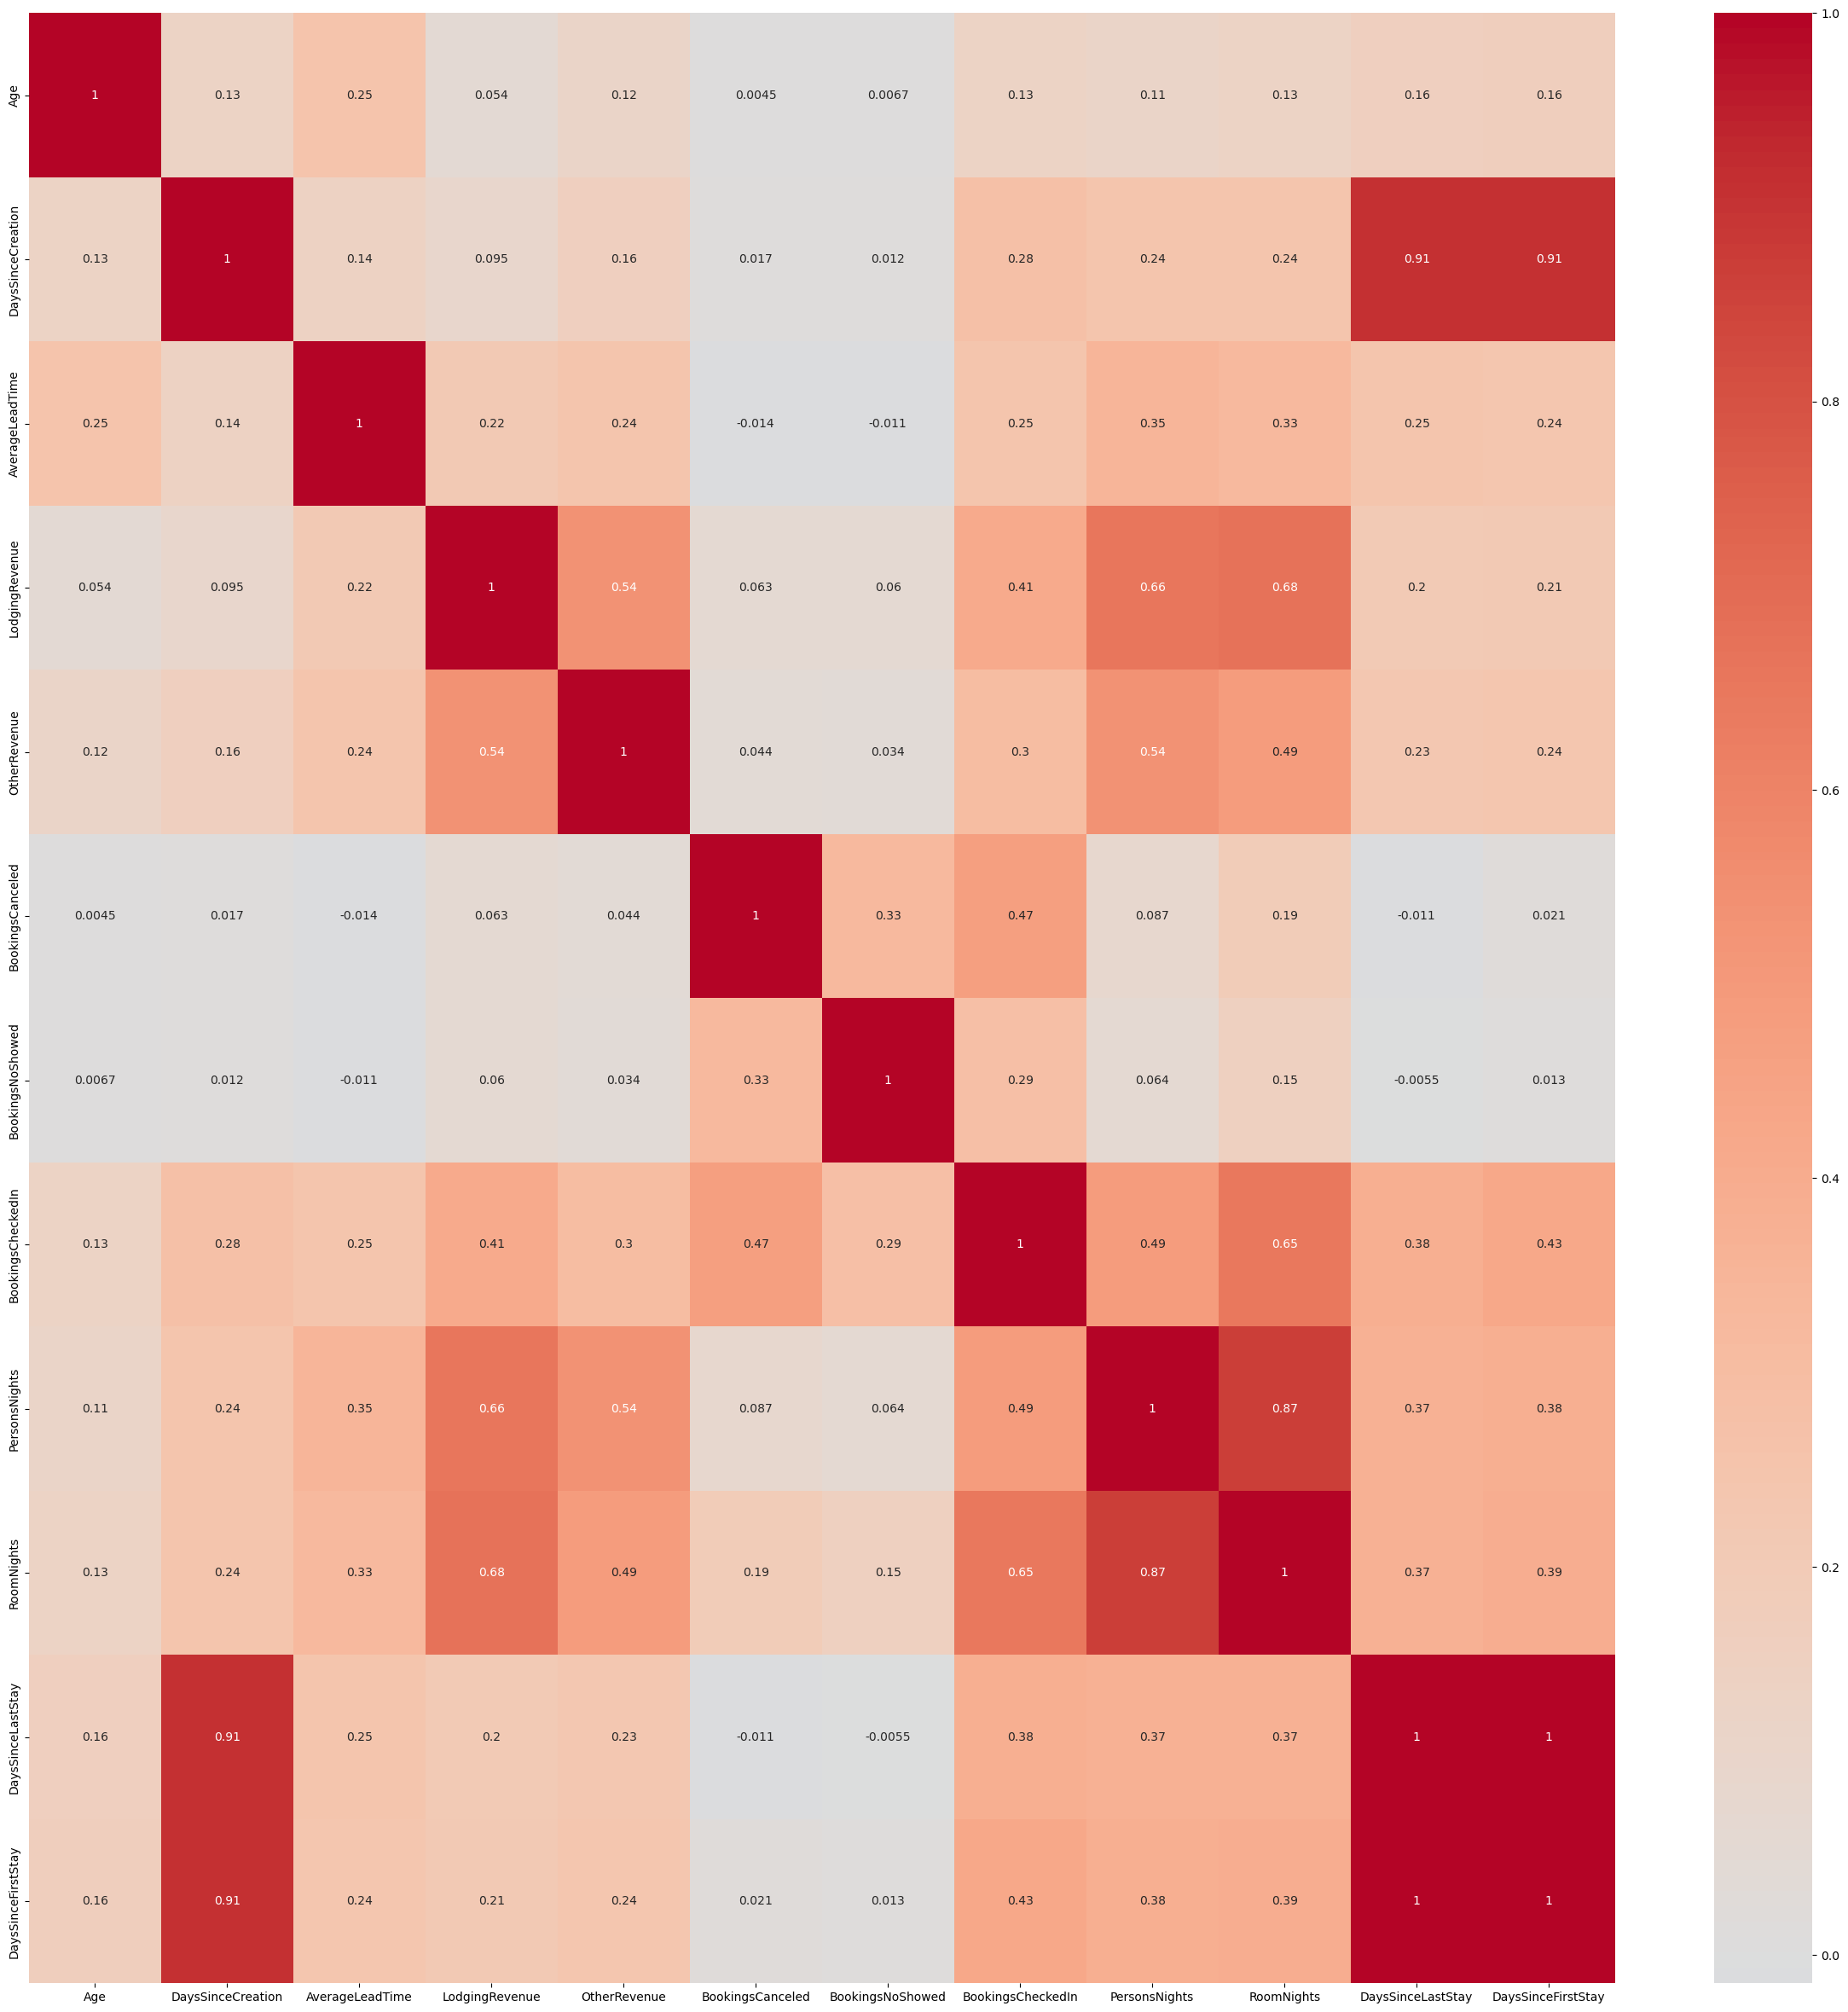

In [14]:
numeric_data = df.select_dtypes(include=['number'])
corrmat = numeric_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.show()

In [19]:
numeric_df = df.select_dtypes(include=['number'])
# Korelasi antar variabel numerik
numeric_df.corr()


,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
Age,1.000000,0.129327,0.252229,0.053606,0.117694,0.004525,0.006748,0.133286,0.112852,0.132383,0.162978,0.163980
DaysSinceCreation,0.129327,1.000000,0.137880,0.095017,0.157979,0.016982,0.012308,0.275261,0.244961,0.243940,0.907308,0.911349
AverageLeadTime,0.252229,0.137880,1.000000,0.219287,0.243129,-0.014479,-0.011388,0.246543,0.351832,0.329748,0.245581,0.241844
LodgingRevenue,0.053606,0.095017,0.219287,1.000000,0.537974,0.063334,0.060205,0.408424,0.656203,0.675884,0.204580,0.214364
OtherRevenue,0.117694,0.157979,0.243129,0.537974,1.000000,0.044341,0.033746,0.304701,0.538393,0.490975,0.230621,0.237076
BookingsCanceled,0.004525,0.016982,-0.014479,0.063334,0.044341,1.000000,0.328435,0.469282,0.086955,0.194487,-0.011095,0.021245
BookingsNoShowed,0.006748,0.012308,-0.011388,0.060205,0.033746,0.328435,1.000000,0.288780,0.064337,0.149811,-0.005512,0.013280
BookingsCheckedIn,0.133286,0.275261,0.246543,0.408424,0.304701,0.469282,0.288780,1.000000,0.489291,0.654642,0.383837,0.427928
PersonsNights,0.112852,0.244961,0.351832,0.656203,0.538393,0.086955,0.064337,0.489291,1.000000,0.871843,0.373218,0.382465
RoomNights,0.132383,0.243940,0.329748,0.675884,0.490975,0.194487,0.149811,0.654642,0.871843,1.000000,0.369923,0.390723


In [15]:
#menghitung jumlah outliers
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
outliers

Age                      29
DaysSinceCreation         0
AverageLeadTime        3178
LodgingRevenue         3723
OtherRevenue           4783
BookingsCanceled         98
BookingsNoShowed         38
BookingsCheckedIn     20420
PersonsNights           966
RoomNights              632
DaysSinceLastStay         0
DaysSinceFirstStay        0
dtype: int64

In [16]:
#MENGATASI OUTLIER DENGAN MENGGUNAKAN WINSORIZE

numeric_df = df.select_dtypes(include=['number'])
# Winsorize setiap kolom numerik di numeric_df
df_winsorized = numeric_df.apply(lambda x: winsorize(x, limits=[0.25, 0.25]))  # Winsorize 25% terendah dan 25% tertinggi
# Cek kembali jumlah outlier setelah winsorizing
Q1_win = df_winsorized.quantile(0.25)
Q3_win = df_winsorized.quantile(0.75)
IQR_win = Q3_win - Q1_win
df_outlier = ((df_winsorized < (Q1_win - 1.5 * IQR_win)) | (df_winsorized > (Q3_win + 1.5 * IQR_win))).sum()

df_outlier

Age                   0
DaysSinceCreation     0
AverageLeadTime       0
LodgingRevenue        0
OtherRevenue          0
BookingsCanceled      0
BookingsNoShowed      0
BookingsCheckedIn     0
PersonsNights         0
RoomNights            0
DaysSinceLastStay     0
DaysSinceFirstStay    0
dtype: int64

In [17]:
df.dtypes

Nationality             object
Age                    float64
DaysSinceCreation        int64
AverageLeadTime          int64
LodgingRevenue         float64
OtherRevenue           float64
BookingsCanceled         int64
BookingsNoShowed         int64
BookingsCheckedIn        int64
PersonsNights            int64
RoomNights               int64
DaysSinceLastStay        int64
DaysSinceFirstStay       int64
DistributionChannel     object
MarketSegment           object
dtype: object

In [18]:
# Melakukan Normalisasi dengan rentang 0-1

# Inisialisasi scaler
scaler = MinMaxScaler()

# Pilih kolom yang akan dinormalisasi
columns_to_normalize = ['DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay']

# Transformasi kolom
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,0.136986,0.078098,0.038317,0.013622,0.111111,0,0.045455,0.068966,0.043103,0.137557,0.961538,Corporate,Corporate
2,DEU,31.0,1.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,Travel Agent/Operator,Travel Agent/Operator
3,FRA,60.0,1.000000,0.159593,0.024787,0.007762,0.000000,0,0.015152,0.086207,0.043103,0.996380,0.984794,Travel Agent/Operator,Travel Agent/Operator
4,FRA,51.0,1.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,Travel Agent/Operator,Travel Agent/Operator
5,JPN,54.0,1.000000,0.100170,0.023754,0.003105,0.000000,0,0.015152,0.034483,0.017241,0.993665,0.982111,Travel Agent/Operator,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,Travel Agent/Operator,Other
83586,IRL,47.0,0.000000,0.186757,0.033783,0.035898,0.000000,0,0.015152,0.051724,0.025862,0.003620,0.003578,Travel Agent/Operator,Other
83587,IRL,53.0,0.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,Travel Agent/Operator,Other
83588,IRL,85.0,0.000000,0.186757,0.101349,0.001164,0.000000,0,0.015152,0.051724,0.025862,0.003620,0.003578,Travel Agent/Operator,Other


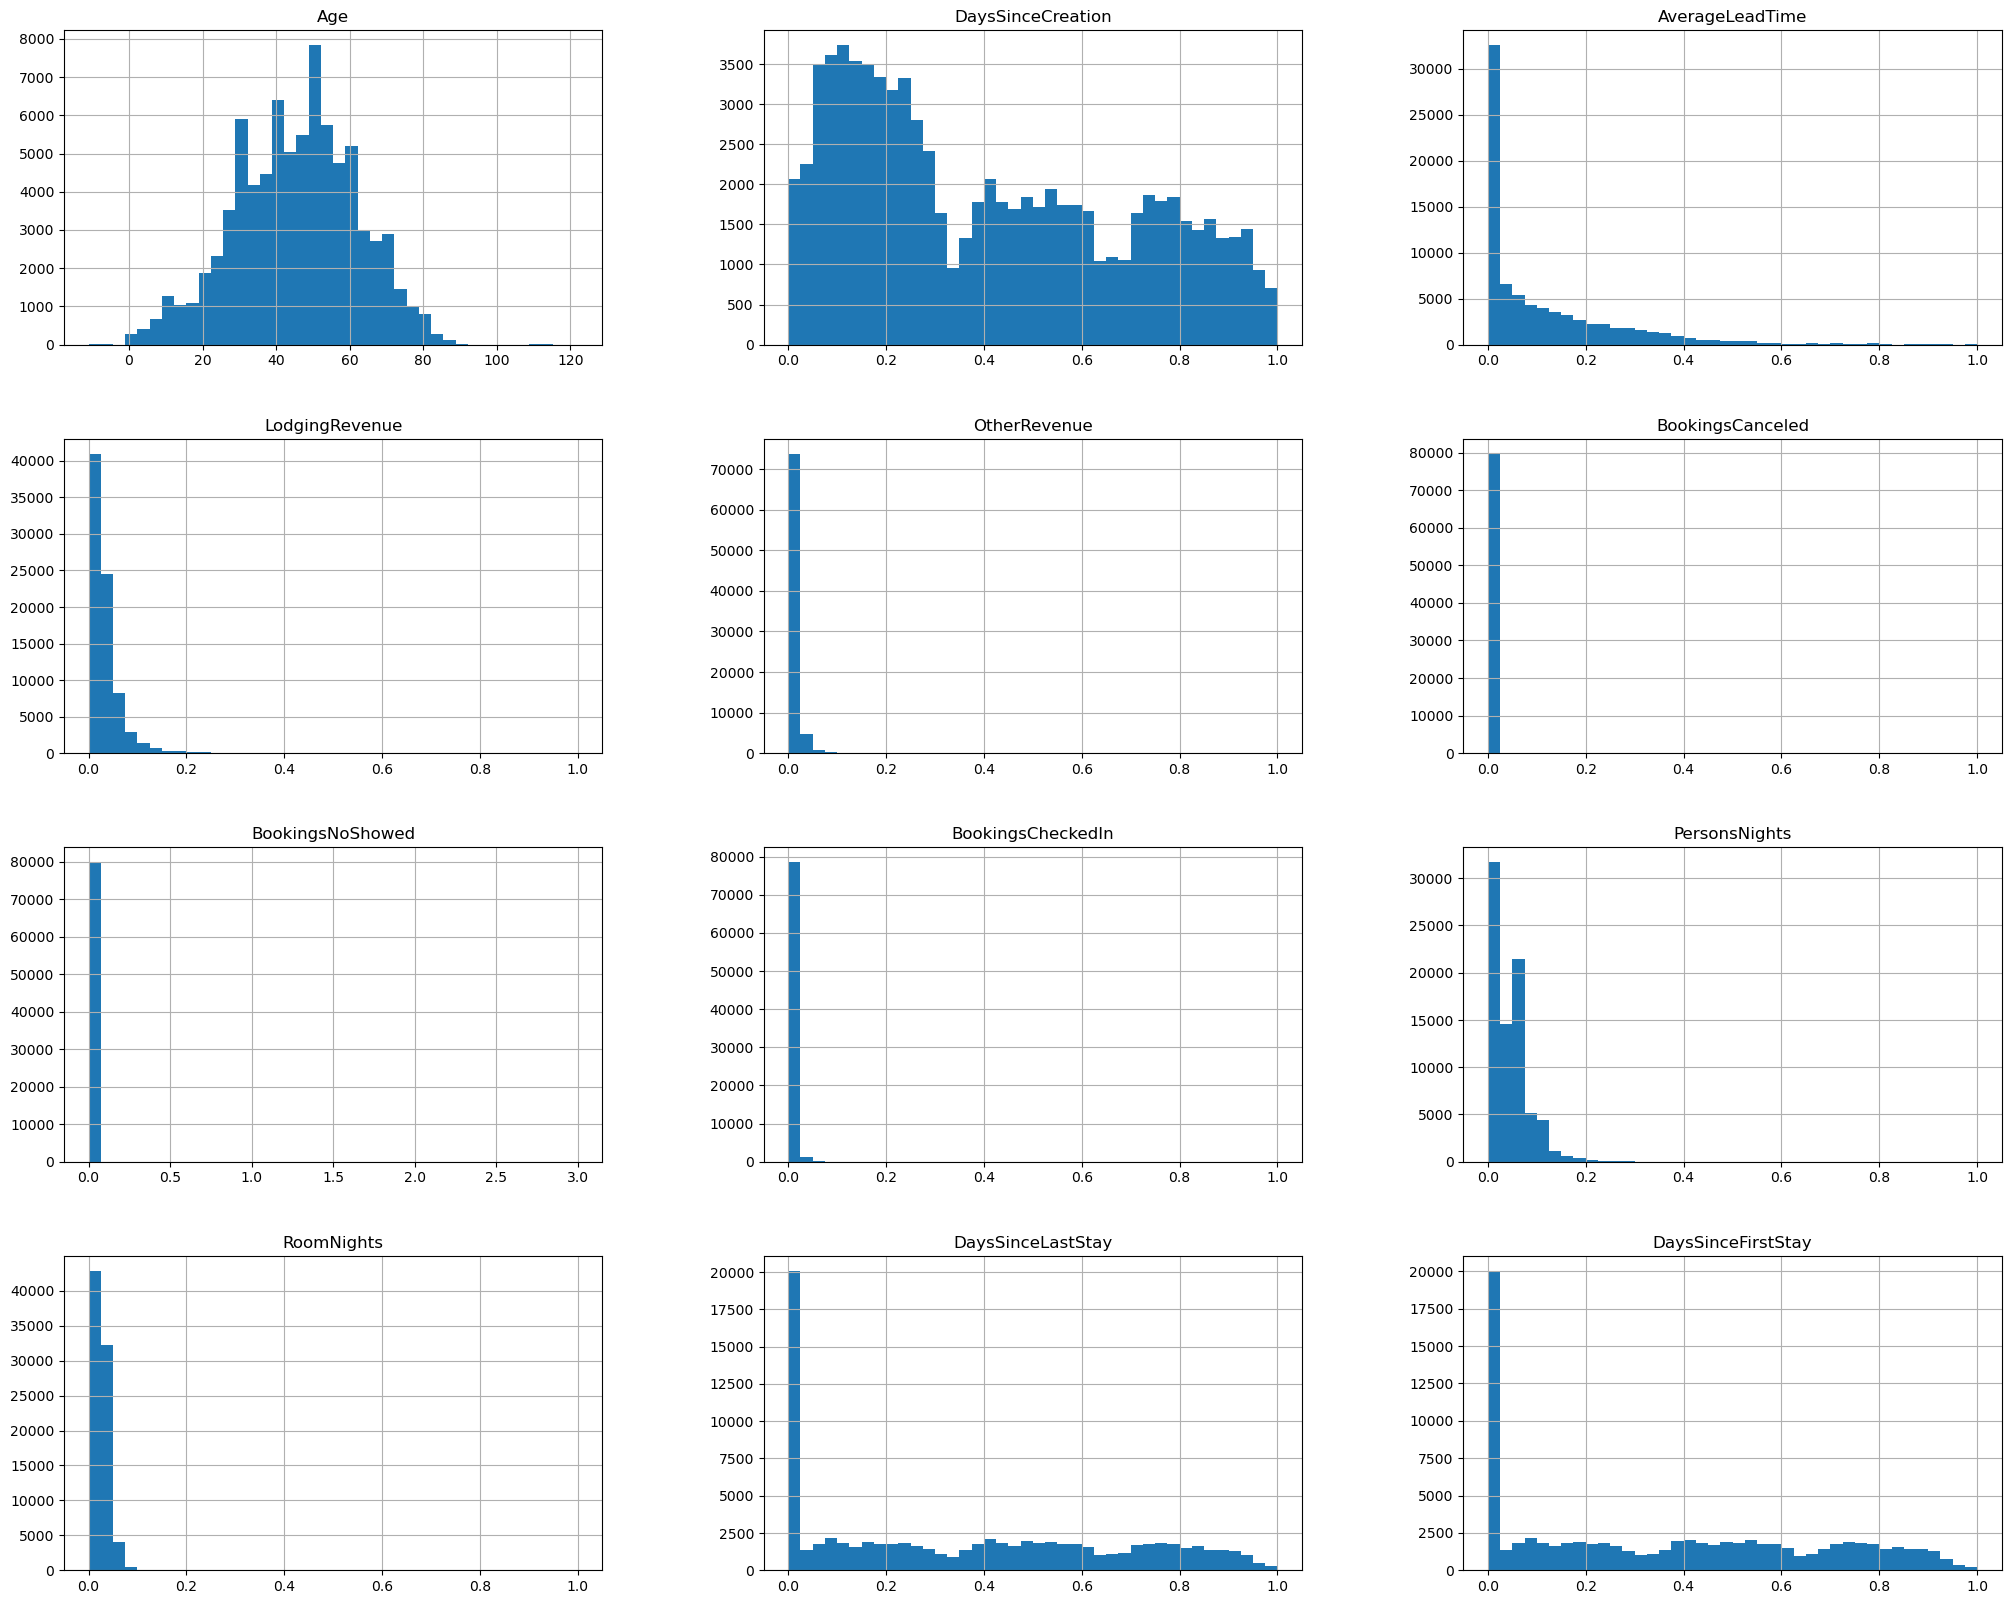

In [20]:
# Histogram
df.hist(bins=40, figsize=(25, 20))
plt.show()

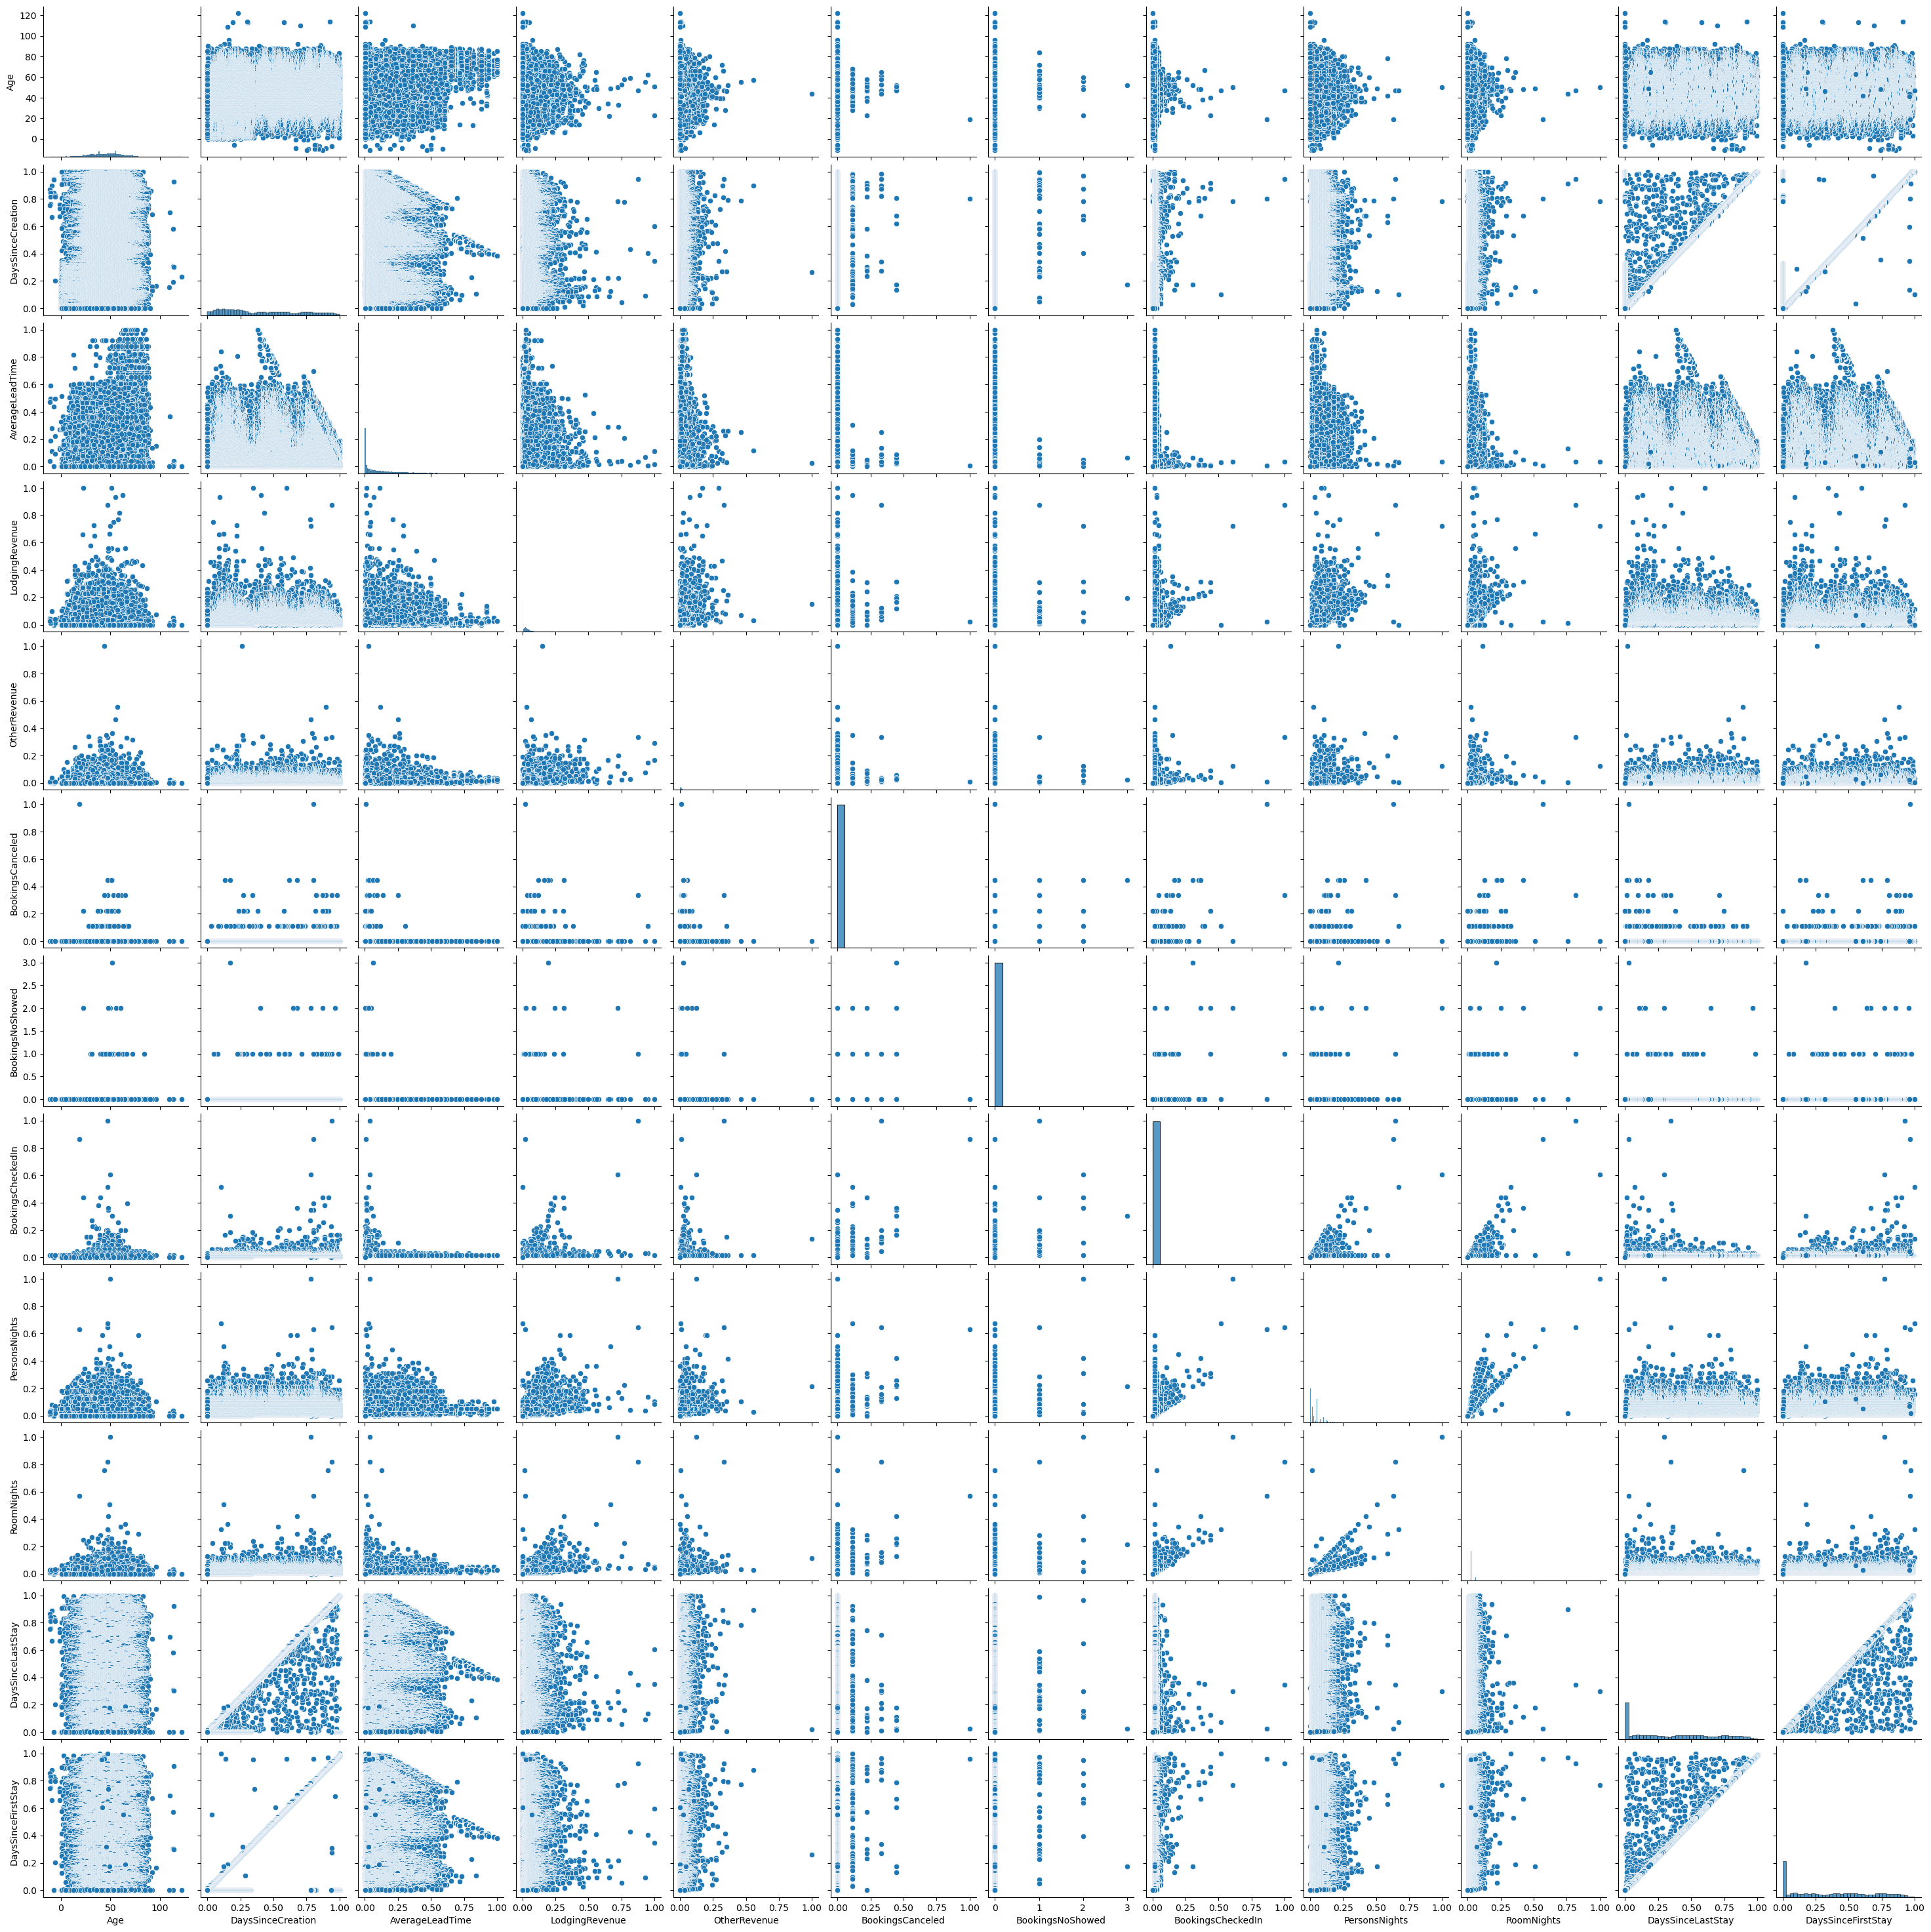

In [21]:
sns.pairplot(data = numeric_df)

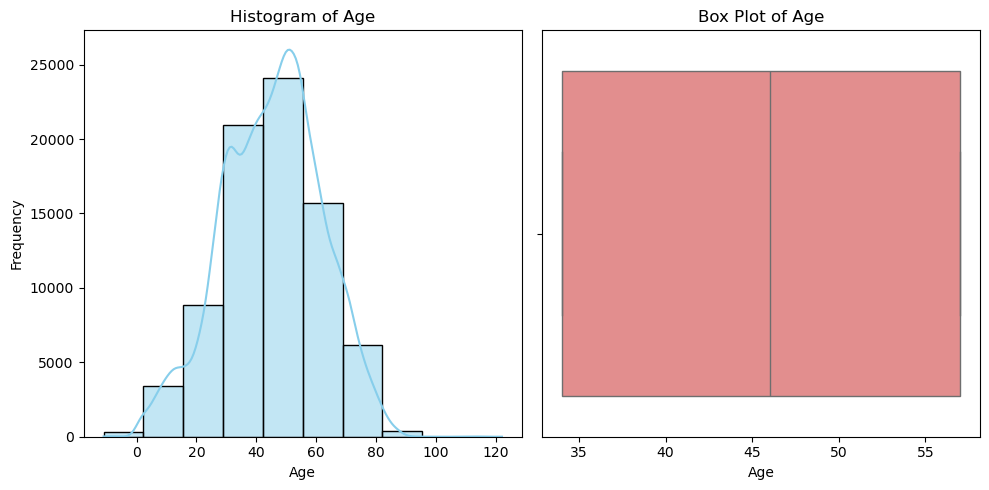

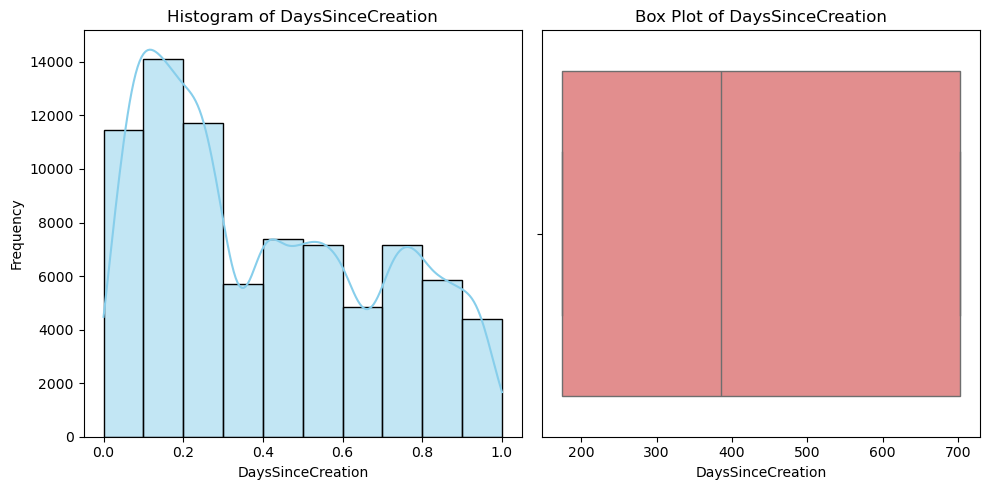

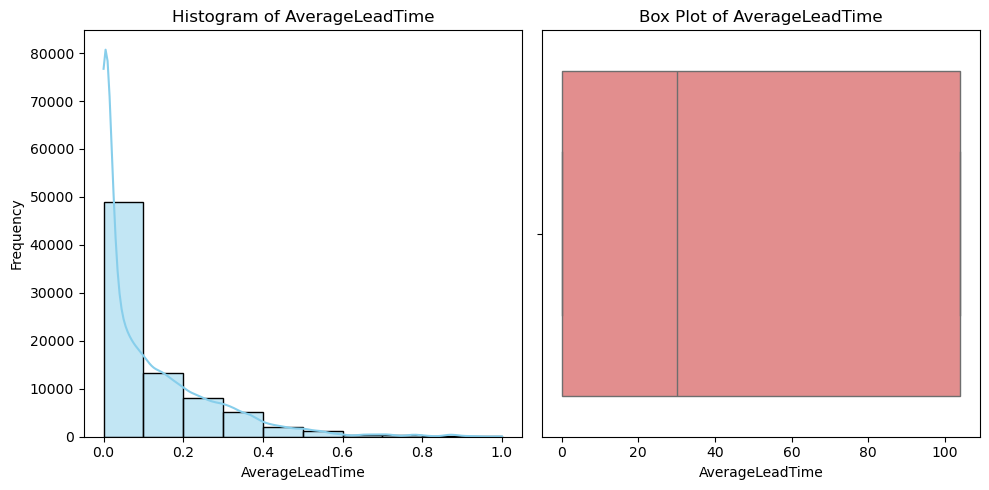

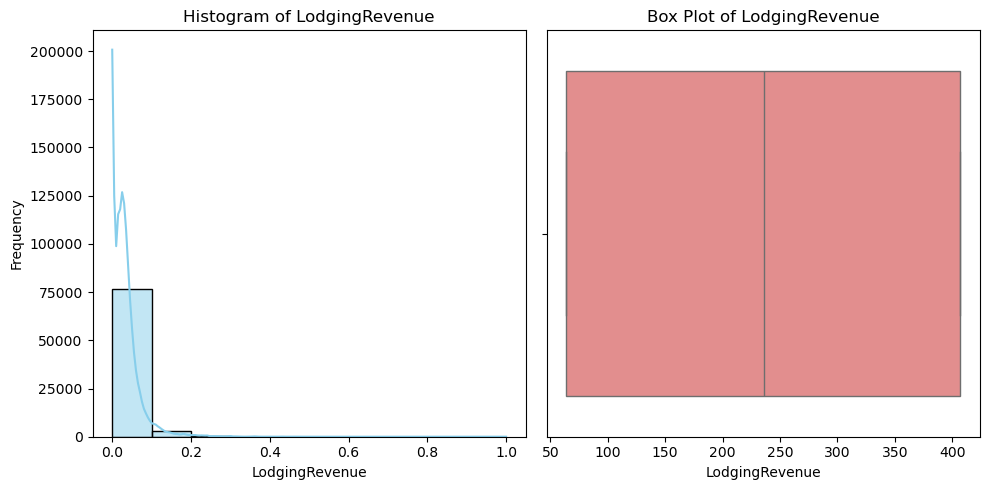

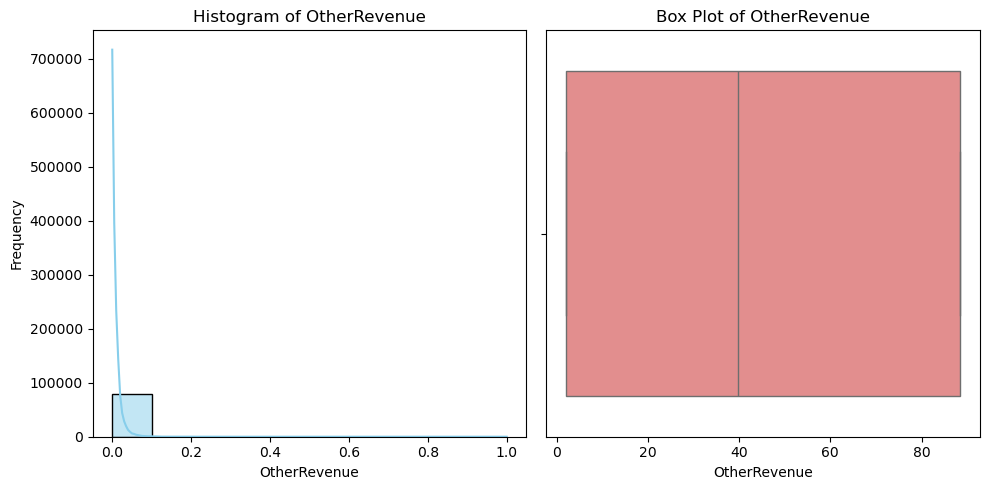

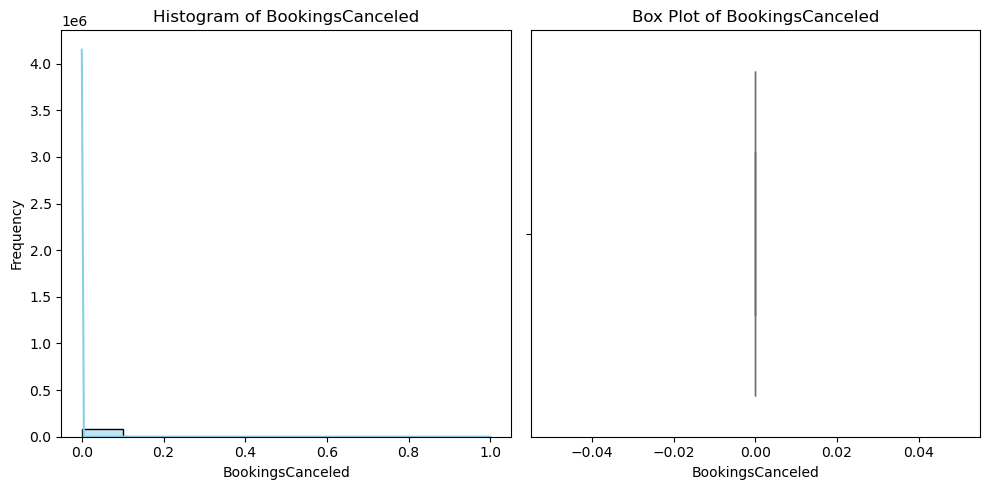

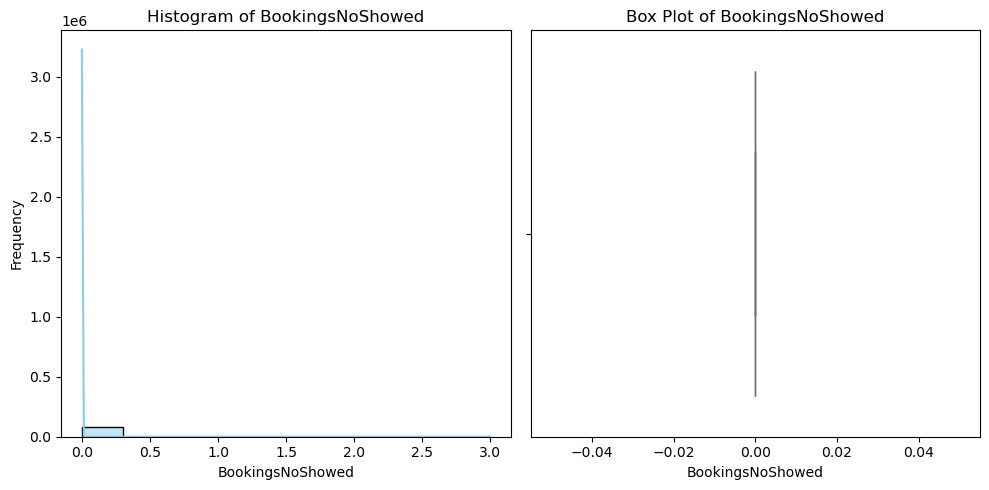

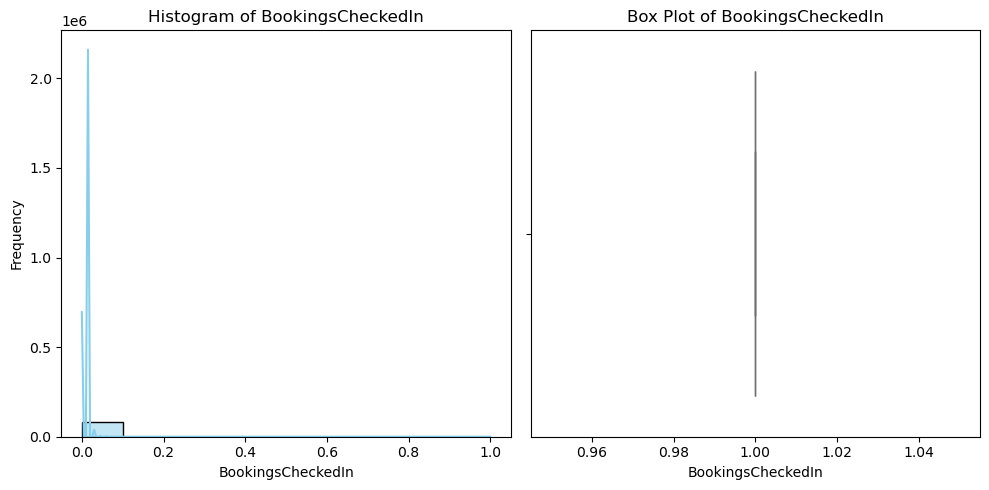

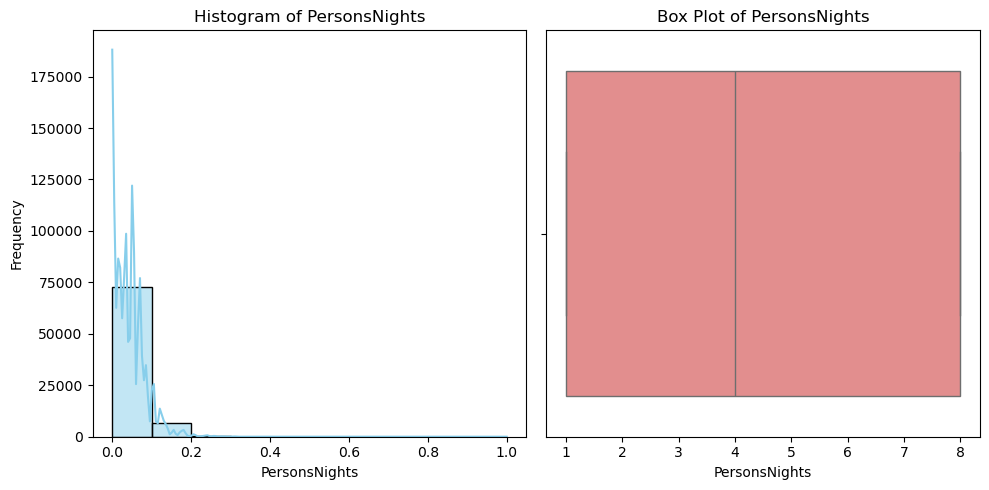

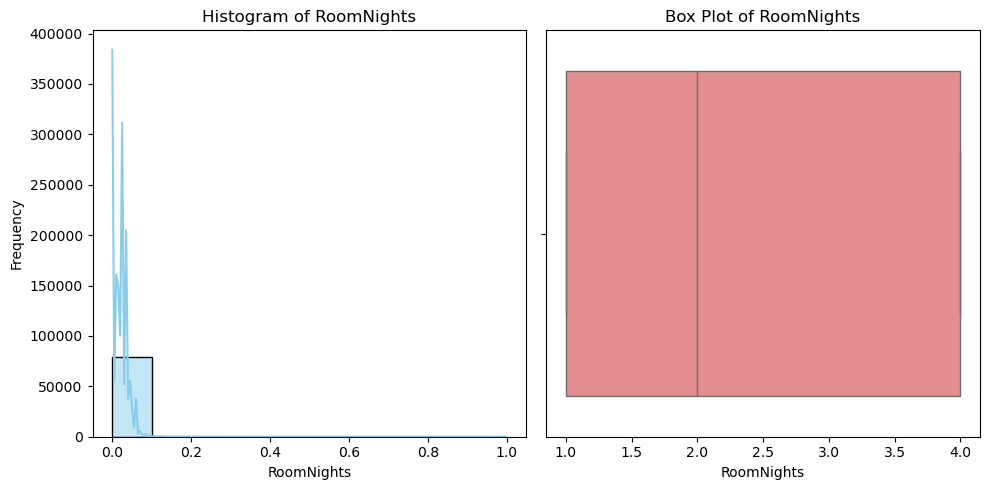

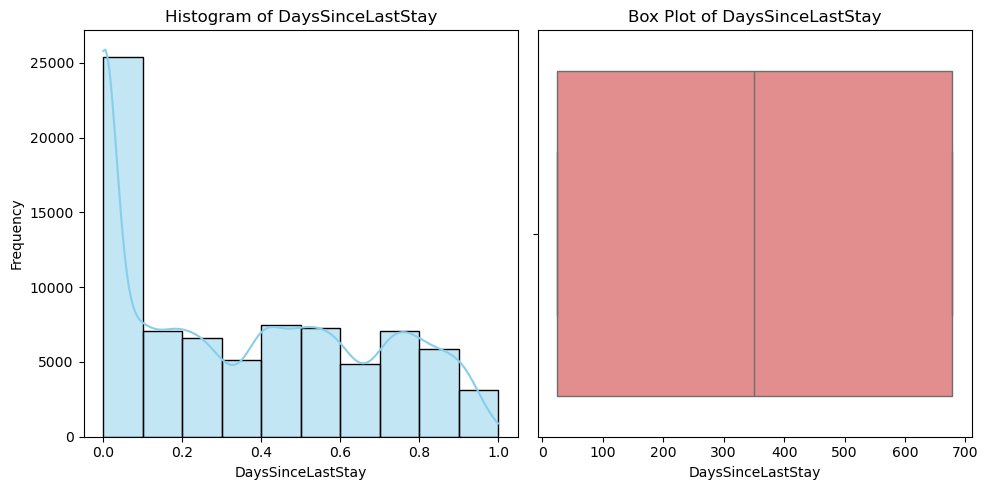

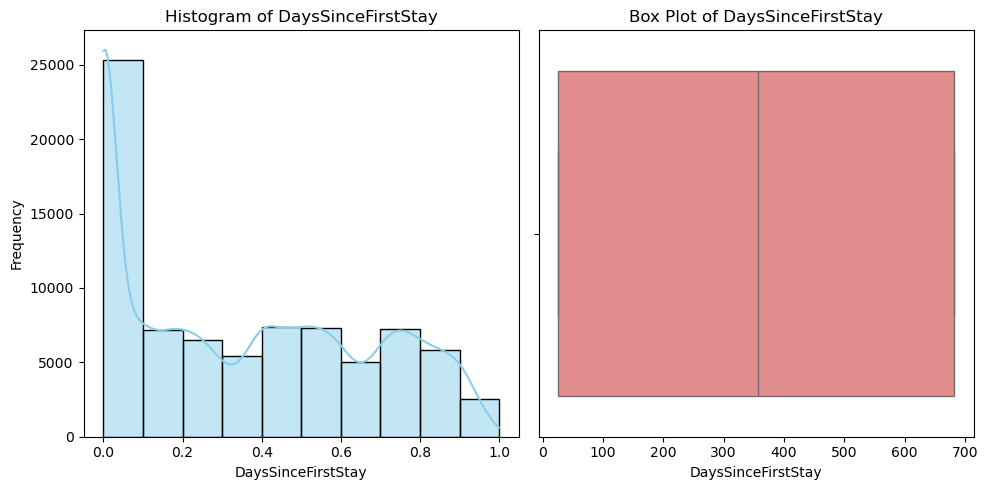

In [22]:
for col in numeric_df.columns:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_winsorized[col], color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


In [23]:
df.dtypes

Nationality             object
Age                    float64
DaysSinceCreation      float64
AverageLeadTime        float64
LodgingRevenue         float64
OtherRevenue           float64
BookingsCanceled       float64
BookingsNoShowed         int64
BookingsCheckedIn      float64
PersonsNights          float64
RoomNights             float64
DaysSinceLastStay      float64
DaysSinceFirstStay     float64
DistributionChannel     object
MarketSegment           object
dtype: object

In [24]:
# Menampilkan nilai unik dari kolom 'DistributionChannel'
print('DistributionChannel')
print(df['DistributionChannel'].unique())

# Menampilkan nilai unik dari kolom 'MarketSegment'
print('MarketSegment')
print(df['MarketSegment'].unique())

DistributionChannel
['Corporate' 'Travel Agent/Operator' 'Direct' 'Electronic Distribution']
MarketSegment
['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Groups'
 'Complementary' 'Aviation']


In [25]:
# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Mengubah kolom 'DistributionChannel' dan 'MarketSegment' menjadi numerik
df['DistributionChannel'] = label_encoder.fit_transform(df['DistributionChannel']) + 1
df['MarketSegment'] = label_encoder.fit_transform(df['MarketSegment']) + 1

# Menampilkan 5 baris pertama untuk melihat hasilnya
df[['DistributionChannel', 'MarketSegment']].head()

,DistributionChannel,MarketSegment
0,1,3
2,4,7
3,4,7
4,4,7
5,4,6


In [26]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,0.136986,0.078098,0.038317,0.013622,0.111111,0,0.045455,0.068966,0.043103,0.137557,0.961538,1,3
2,DEU,31.0,1.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,4,7
3,FRA,60.0,1.000000,0.159593,0.024787,0.007762,0.000000,0,0.015152,0.086207,0.043103,0.996380,0.984794,4,7
4,FRA,51.0,1.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,4,7
5,JPN,54.0,1.000000,0.100170,0.023754,0.003105,0.000000,0,0.015152,0.034483,0.017241,0.993665,0.982111,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,4,6
83586,IRL,47.0,0.000000,0.186757,0.033783,0.035898,0.000000,0,0.015152,0.051724,0.025862,0.003620,0.003578,4,6
83587,IRL,53.0,0.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,4,6
83588,IRL,85.0,0.000000,0.186757,0.101349,0.001164,0.000000,0,0.015152,0.051724,0.025862,0.003620,0.003578,4,6


In [27]:
df.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,0.136986,0.078098,0.038317,0.013622,0.111111,0,0.045455,0.068966,0.043103,0.137557,0.961538,1,3
2,DEU,31.0,1.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,4,7
3,FRA,60.0,1.000000,0.159593,0.024787,0.007762,0.000000,0,0.015152,0.086207,0.043103,0.996380,0.984794,4,7
4,FRA,51.0,1.000000,0.001698,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,4,7
5,JPN,54.0,1.000000,0.100170,0.023754,0.003105,0.000000,0,0.015152,0.034483,0.017241,0.993665,0.982111,4,6


In [28]:
# Menghitung jumlah kategori DistributionChannel
jumlah_kategori = df['DistributionChannel'].value_counts()

print(jumlah_kategori)

DistributionChannel
4    65692
2    11308
1     2318
3      493
Name: count, dtype: int64


In [29]:
# Menghitung jumlah kategori MarketSegment
jumlah_kategori = df['MarketSegment'].value_counts()

print(jumlah_kategori)

MarketSegment
6    46204
7    11253
4    10938
5     8861
3     1914
2      418
1      223
Name: count, dtype: int64
